## Cost Benefit Questions
1. How would you rephrase the business problem if your model was optimising toward _precision_? i.e., How might the model behave differently and what effect would it have?
2. How would you rephrase the business problem if your model was optimising toward _recall_?
3. What would the most ideal model look like in this case?

Answers: ?

### Visualising models over variables

In [1]:
import pandas as pd
import sklearn.linear_model as lm

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/home/mactzu/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
df = pd.read_csv("../../../../data/flight_delays.csv")
df = df.loc[df.DEP_DEL15.notnull()].copy()

In [16]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,...,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6,dow_7,probability,probability_0,probability_1
0,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,...,0,0,0,1,0,0,0,0.129193,1,0.165634
1,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,...,0,0,0,1,0,0,0,0.129193,0,0.165634
2,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,...,0,0,0,1,0,0,0,0.158102,0,0.200966
3,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,...,0,0,0,1,0,0,0,0.157153,0,0.199817
4,1,4,2015-01-01,AA,19805,AA,11298,1129803,30194,12173,...,0,0,0,1,0,0,0,0.165363,1,0.209741


In [4]:
df = df[df.DEP_DEL15.notnull()]
df = df.join(pd.get_dummies(df["CARRIER"], prefix = "carrier"))
df = df.join(pd.get_dummies(df["DAY_OF_WEEK"], prefix = "dow"))
model = lm.LogisticRegression()
features = [i for i in df.columns if "dow_" in i]

In [20]:
df.columns

Index([u'DAY_OF_MONTH', u'DAY_OF_WEEK', u'FL_DATE', u'UNIQUE_CARRIER',
       u'AIRLINE_ID', u'CARRIER', u'ORIGIN_AIRPORT_ID',
       u'ORIGIN_AIRPORT_SEQ_ID', u'ORIGIN_CITY_MARKET_ID', u'DEST_AIRPORT_ID',
       u'DEST_AIRPORT_SEQ_ID', u'DEST_CITY_MARKET_ID', u'CRS_DEP_TIME',
       u'DEP_TIME', u'DEP_DEL15', u'Unnamed: 15', u'carrier_AA', u'carrier_AS',
       u'carrier_B6', u'carrier_DL', u'carrier_EV', u'carrier_F9',
       u'carrier_HA', u'carrier_MQ', u'carrier_NK', u'carrier_OO',
       u'carrier_UA', u'carrier_US', u'carrier_VX', u'carrier_WN', u'dow_1',
       u'dow_2', u'dow_3', u'dow_4', u'dow_5', u'dow_6', u'dow_7',
       u'probability', u'probability_0', u'probability_1'],
      dtype='object')

In [22]:
df["CRS_DEP_TIME"]

0          900
1          900
2         1230
3         1220
4         1305
6         1215
7         1745
8          700
9         2150
10        1115
11        2300
12         800
13        1245
14         700
15        1100
16        1500
17        1845
18        1515
19         755
20        1050
21         720
22         900
23        1850
24        1500
26        1225
27        2330
28         805
29        1415
30        1955
31        1445
          ... 
469938    1010
469939    1915
469940     940
469941    1455
469942     900
469943    1125
469944    1105
469945    1825
469946    1050
469947     920
469948    1730
469949    1715
469950     800
469951     705
469952     935
469953    1305
469954     625
469955    1710
469956     745
469957    1550
469958    1040
469959    1120
469960    1510
469961     725
469962    1305
469963    1145
469964    1805
469965     710
469966     755
469967     815
Name: CRS_DEP_TIME, dtype: int64

In [6]:
features += ["CRS_DEP_TIME"]
model.fit(df[features[1:]], df["DEP_DEL15"])

df["probability"] = model.predict_proba(df[features[1:]]).T[1]

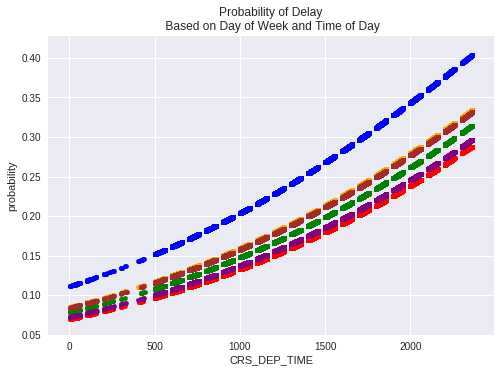

In [7]:
ax = plt.subplot(111)
colors = ["blue", "green", "red", "purple", "orange", "brown"]
for e, c in enumerate(colors):
    df[df[features[e]] == 1].plot(x = "CRS_DEP_TIME",
                                  y = "probability",
                                  kind = "scatter",
                                  color = c,
                                  ax = ax)
ax.set(title = "Probability of Delay\n Based on Day of Week and Time of Day")
plt.show()

### Other Answers: Visualising Airline performance over time; Visualising the inverse

In [ ]:
# <code Here>

## Visualising Performance Against Baseline

### Visualising AUC and comparing Models

In [11]:
from sklearn import dummy, metrics

In [12]:
model0 = dummy.DummyClassifier()
model0.fit(df[features[1:]], df["DEP_DEL15"])
df["probability_0"] = model0.predict_proba(df[features[1:]]).T[1]

model1 = lm.LogisticRegression()
model.fit(df[features[1:]], df["DEP_DEL15"])
df["probability_1"] = model.predict_proba(df[features[1:]]).T[1]

In [13]:
df.shape

(458311, 40)

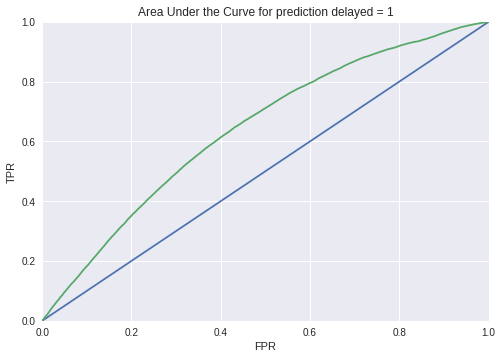

In [14]:
ax = plt.subplot(111)
vals = metrics.roc_curve(df.DEP_DEL15, df.probability_0)
ax.plot(vals[0], vals[1])
vals = metrics.roc_curve(df.DEP_DEL15, df.probability_1)
ax.plot(vals[0], vals[1])

ax.set(title = "Area Under the Curve for prediction delayed = 1",
       xlabel = "FPR",
       ylabel = "TPR",
       xlim = (0, 1),
       ylim = (0, 1))
plt.show()

### Visualising Precision / Recall (with cleaner code)

In [ ]:
# <Code Here>

In [ ]:
# <Code Here>